In [52]:
# a) Import the  packages such as pandas, numpy, sklearn, matplotlib, and seaborn
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sns

In [14]:
# b) Read the data
data = pd.read_csv('/content/sample_data/diabetes-1.csv')

In [15]:
# c) Get the colnames
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# d) Find the datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# e) Describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
# e2) Show head of data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Not_Diabetes,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1,0,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,0,1
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1


In [25]:
# f) For the outcome column, make two new columns with one being "Not_Diabetes" and other "Diabetes"
data['Not_Diabetes'] = 0
data['Diabetes'] = 0
for i in range(len(data['Outcome'])):
  if data['Outcome'][i] == 1:
    data['Diabetes'][i] = 1
  else:
    data['Not_Diabetes'][i] = 1



<ipython-input-25-1157894b2d78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diabetes'][i] = 1
<ipython-input-25-1157894b2d78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Not_Diabetes'][i] = 1
<ipython-input-25-1157894b2d78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diabetes'][i] = 1
<ipython-input-25-1157894b2d78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

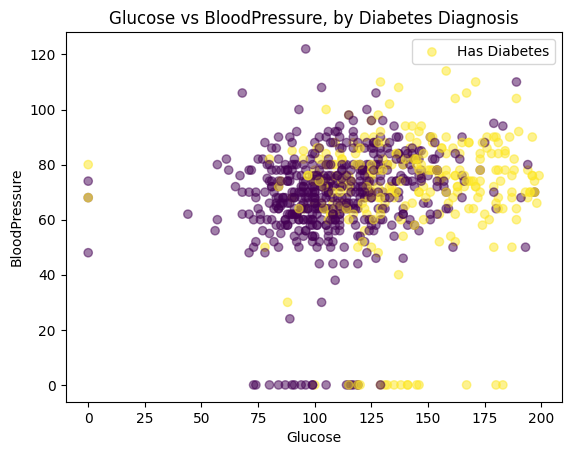

In [50]:
# g) Make scatterplot of Glucose and bloodpressure, with coloring by diabetes or no diabetes
plt.scatter(data['Glucose'], data['BloodPressure'], c=data['Diabetes'], alpha = .5)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure, by Diabetes Diagnosis')
plt.legend(['Has Diabetes', 'No Diabetes'])
plt.show()

In [59]:
# h1) Create boxplots for entire dataset, continuous variables only.
# Boxplots are not very useful for binary data, like the outcome (hence we drop it)
dataContinuous = data.drop(['Outcome', 'Not_Diabetes', 'Diabetes'], axis=1)
dataContinuous.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Text(0, 0.5, 'Count')

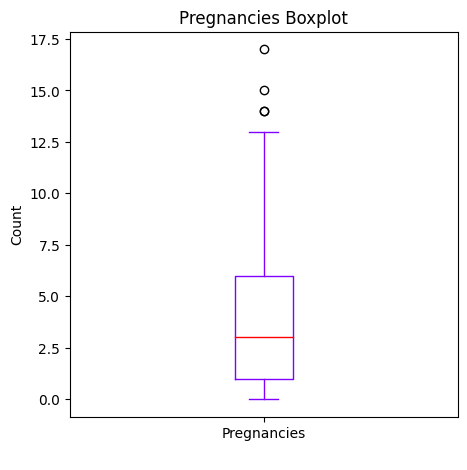

In [79]:
# h2) Show pregnancies boxplot, with a colormap chosen
boxPlotPregnancy = dataContinuous.Pregnancies.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotPregnancy.set_title('Pregnancies Boxplot')
boxPlotPregnancy.set_xlabel(' ')
boxPlotPregnancy.set_ylabel('Count')

Text(0, 0.5, 'Measurement')

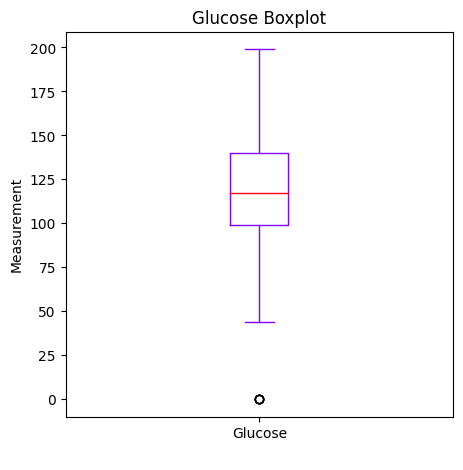

In [80]:
# h3) Show glucose boxplot, with a colormap chosen
boxPlotGlucose = dataContinuous.Glucose.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotGlucose.set_title('Glucose Boxplot')
boxPlotGlucose.set_xlabel(' ')
boxPlotGlucose.set_ylabel('Measurement')

Text(0, 0.5, 'Measurement')

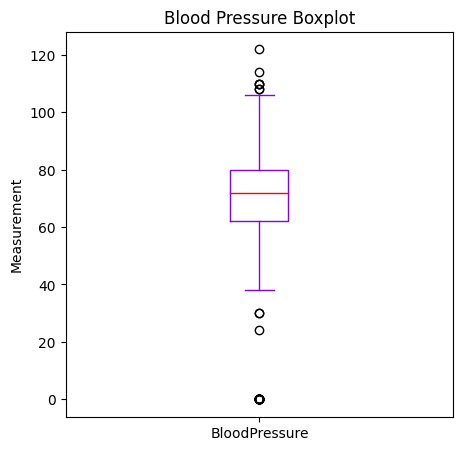

In [87]:
# h4) Show blood pressure boxplot, with a colormap chosen
boxPlotBloodPressure = dataContinuous.BloodPressure.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotBloodPressure.set_title('Blood Pressure Boxplot')
boxPlotBloodPressure.set_xlabel(' ')
boxPlotBloodPressure.set_ylabel('Measurement')

Text(0, 0.5, 'Measurement')

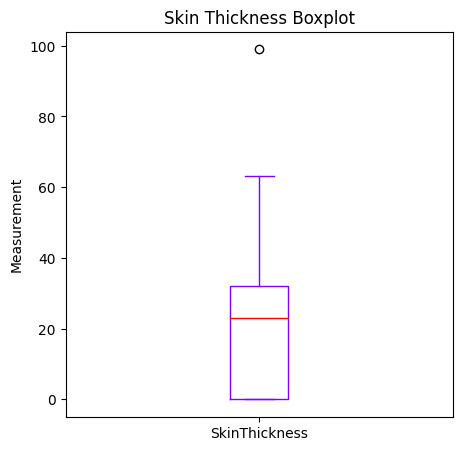

In [89]:
# h5) Show skin thickness boxplot
boxPlotSkinThickness = dataContinuous.SkinThickness.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotSkinThickness.set_title('Skin Thickness Boxplot')
boxPlotSkinThickness.set_xlabel(' ')
boxPlotSkinThickness.set_ylabel('Measurement')

Text(0, 0.5, 'Measurement')

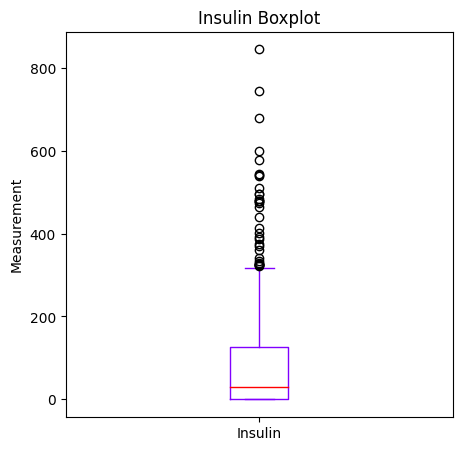

In [90]:
# h6) Show insulin boxplot
boxPlotInsulin = dataContinuous.Insulin.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotInsulin.set_title('Insulin Boxplot')
boxPlotInsulin.set_xlabel(' ')
boxPlotInsulin.set_ylabel('Measurement')

Text(0, 0.5, 'Measurement')

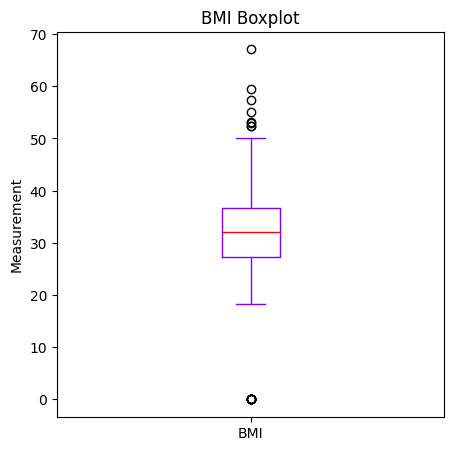

In [91]:
# h7) Show BMI boxplot
boxPlotBmi = dataContinuous.BMI.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotBmi.set_title('BMI Boxplot')
boxPlotBmi.set_xlabel(' ')
boxPlotBmi.set_ylabel('Measurement')

Text(0, 0.5, 'Measurement')

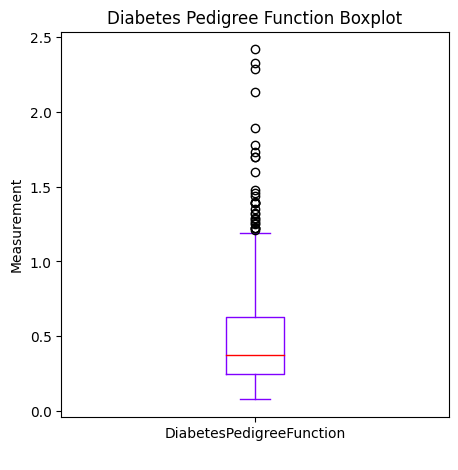

In [92]:
# h8) Show DiabetesPedigreeFunction boxplot
boxPlotDiabetesPedigreeFunction = dataContinuous.DiabetesPedigreeFunction.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotDiabetesPedigreeFunction.set_title('Diabetes Pedigree Function Boxplot')
boxPlotDiabetesPedigreeFunction.set_xlabel(' ')
boxPlotDiabetesPedigreeFunction.set_ylabel('Measurement')

Text(0, 0.5, 'Years')

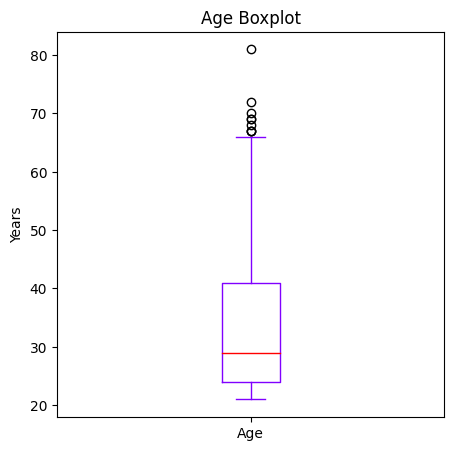

In [94]:
# h9) Show Age boxplot
boxPlotAge = dataContinuous.Age.plot(kind='box', colormap='rainbow', figsize=(5, 5))
boxPlotAge.set_title('Age Boxplot')
boxPlotAge.set_xlabel(' ')
boxPlotAge.set_ylabel('Years')

In [100]:
# i) Check for multicollinearity between diabetes, glucose, bp and insulin
X = data[['Diabetes', 'Glucose', 'BloodPressure', 'Insulin']]
corrMatrix = np.corrcoef(X, rowvar=False)
print('Correlation matrix:\n', corrMatrix) # print matrix
# Now calculate determinant
corrDet = np.linalg.det(corrMatrix)
print('\nMatrix determinant: ', corrDet) # print determinant. corrDet = 0.67, which indicates that there is not too much correlation between the variables
# there is no multicollinearity, or at least not enough to reject any particular variable

Correlation matrix:
 [[1.         0.4665814  0.06506836 0.13054795]
 [0.4665814  1.         0.15258959 0.33135711]
 [0.06506836 0.15258959 1.         0.08893338]
 [0.13054795 0.33135711 0.08893338 1.        ]]

Matrix determinant:  0.6784529109819948
